# Deep Learning pour l'évaluation de la classification des images

------------


## Les données

**Tâche 1 : Exécutez le code ci-dessous pour télécharger l'ensemble de données en utilisant Keras.**

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Visualisation des données

**Tâche 2 : Utilisez matplotlib pour visualiser une image de l'ensemble des données. Il peut s'agir de n'importe quelle image de l'ensemble de données.**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

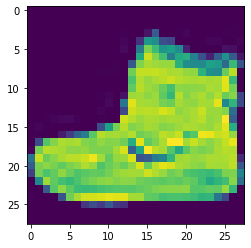

In [ ]:
plt.imshow(x_train[0])

In [ ]:
y_train[0]

9

## Pré-traitement des données

**Tâche 3 : Normaliser les données d'entraînement X et les données de test X en les divisant par la valeur maximale des tableaux d'images.**

In [ ]:
x_train.max()

255

In [ ]:
x_train = x_train/255

In [ ]:
x_test = x_test/255

**Tâche 4 : remodeler (reshape) les tableaux X pour inclure une dimension 4 du canal unique. Similaire à ce que nous avons fait pour l'ensemble de données des chiffres MNIST.**

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = x_train.reshape(60000,28,28,1)

In [ ]:
x_test = x_test.reshape(10000,28,28,1)

**Tâche 5 : Convertir les valeurs y_train et y_test pour qu'elles soient encodées en one-hot pour une analyse catégorielle par Keras.**

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
y_cat_train = to_categorical(y_train)

In [ ]:
y_cat_test = to_categorical(y_test)

## Construction du Modèle

**Tâche 5 : Utilisez Keras pour créer un modèle composé d'au moins les couches suivantes (mais n'hésitez pas à expérimenter):**

* Couche convolutionnelle 2D, filtres=32 et kernel_size=(4,4)
* Couche de Pooling où pool_size = (2,2)

* Aplatir la couche
* Couche Flatten (128 neurones, mais n'hésitez pas à jouer avec cette valeur), activation RELU

* Couche finale Dense de 10 neurones avec une activation softmax

**Compilez ensuite le modèle avec ces paramètres : loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()

# Couche convolutive
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
# Couche de Pooling
model.add(MaxPool2D(pool_size=(2, 2)))

# Images applaties de 28 par 28 à 764 avant la couche finale
model.add(Flatten())

# 128 neurones dans une couche cachée Dense (Vous pouvez changer ce nombre de neurones)
model.add(Dense(128, activation='relu'))

# La dernière couche est le classificateur, donc 1à classes possibles
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


### Entraînement du Modèle

**Tâche 6 : Train/Fit le modèle pour le set x_train. Le nombre d'ipochs dépend de vous**.

In [ ]:
model.fit(x_train,y_cat_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.3967 - accuracy: 0.8574
Epoch 2/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2784 - accuracy: 0.8974
Epoch 3/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2343 - accuracy: 0.9131
Epoch 4/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.2021 - accuracy: 0.9253
Epoch 5/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1740 - accuracy: 0.9359
Epoch 6/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1508 - accuracy: 0.9444
Epoch 7/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1308 - accuracy: 0.9516
Epoch 8/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1117 - accuracy: 0.9579
Epoch 9/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0973 - accuracy: 0.9640
Epoch 10/10
1875/1875 [==============================] - 32s 17m

### Évaluation du Modèle

**Tâche 7 : Montrez l'exactitude (accuracy), la précision, le rappel (recall), et le Score-F1 du modèle obtenu sur l'ensemble de données x_test. Gardez à l'esprit qu'il y a plusieurs façons de le faire, mais nous vous recommandons de suivre la même procédure que celle que nous avons montrée dans la vidéo sur le MNIST**.

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3188 - accuracy: 0.9108


[0.31881871819496155, 0.9107999801635742]

In [ ]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.3188 - accuracy: 0.9108


[0.31881871819496155, 0.9107999801635742]

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

In [ ]:
predictions = np.argmax(model.predict(x_test), axis=-1)

In [ ]:
y_cat_test.shape

(10000, 10)

In [ ]:
y_cat_test[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
predictions[0]

9

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1000
           1       0.99      0.99      0.99      1000
           2       0.88      0.83      0.85      1000
           3       0.93      0.91      0.92      1000
           4       0.88      0.84      0.86      1000
           5       0.99      0.97      0.98      1000
           6       0.70      0.81      0.75      1000
           7       0.96      0.95      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.94      0.98      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

